In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('breast-cancer.csv')

# Drop unnecessary columns
# Drop only 'id' column safely
df.drop(columns=['id'], inplace=True)

# Encode target variable
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Select only 2 features for visualization later
features = ['radius_mean', 'texture_mean']
X = df[features]
y = df['diagnosis']

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC()

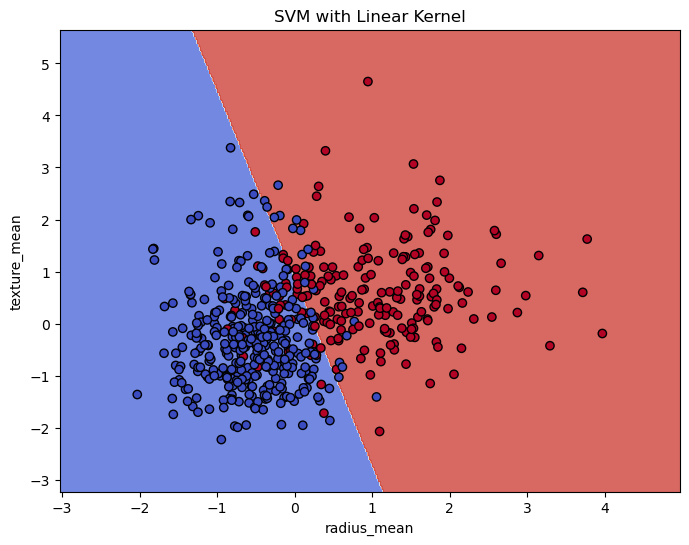

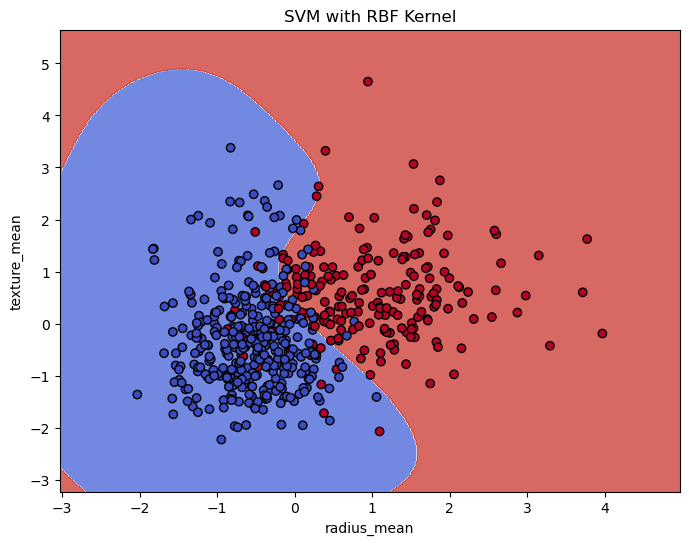

In [10]:
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(title)
    plt.show()

# Plot boundaries
plot_decision_boundary(svm_linear, X_scaled, y, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_scaled, y, "SVM with RBF Kernel")

In [12]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_scaled, y)

# Best parameters
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [14]:
from sklearn.model_selection import cross_val_score

# Cross-validation on best model
best_model = grid.best_estimator_
scores = cross_val_score(best_model, X_scaled, y, cv=5)

print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.85087719 0.89473684 0.90350877 0.92982456 0.91150442]
Mean Accuracy: 0.8980903586399627
